In [1]:
import joblib
import pandas as pd
from src.run_training import run_training

run_training()
X_test = pd.read_parquet("output/xgboost_test_data.parquet").drop(columns=["vote_id", "voting_party", "ground_truth"])
model = joblib.load("output/xgboost_model.pkl")

c:\Users\johnn\Desktop\quantifying-political-consistency\src\run_training.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(False)
e:\Users\johnn\anaconda3\envs\langchain\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:51:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8686868686868687

Classification Report:
              precision    recall  f1-score   support

   Ablehnung       0.87      0.92      0.90       344
     Annahme       0.90      0.88      0.89       309
  Enthaltung       0.44      0.30      0.36        40

    accuracy                           0.87       693
   macro avg       0.74      0.70      0.72       693
weighted avg       0.86      0.87      0.86       693


Confusion Matrix:
[[317  20   7]
 [ 28 273   8]
 [ 19   9  12]]


c:\Users\johnn\Desktop\quantifying-political-consistency\src\run_training.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(False)


e:\Users\johnn\anaconda3\envs\langchain\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


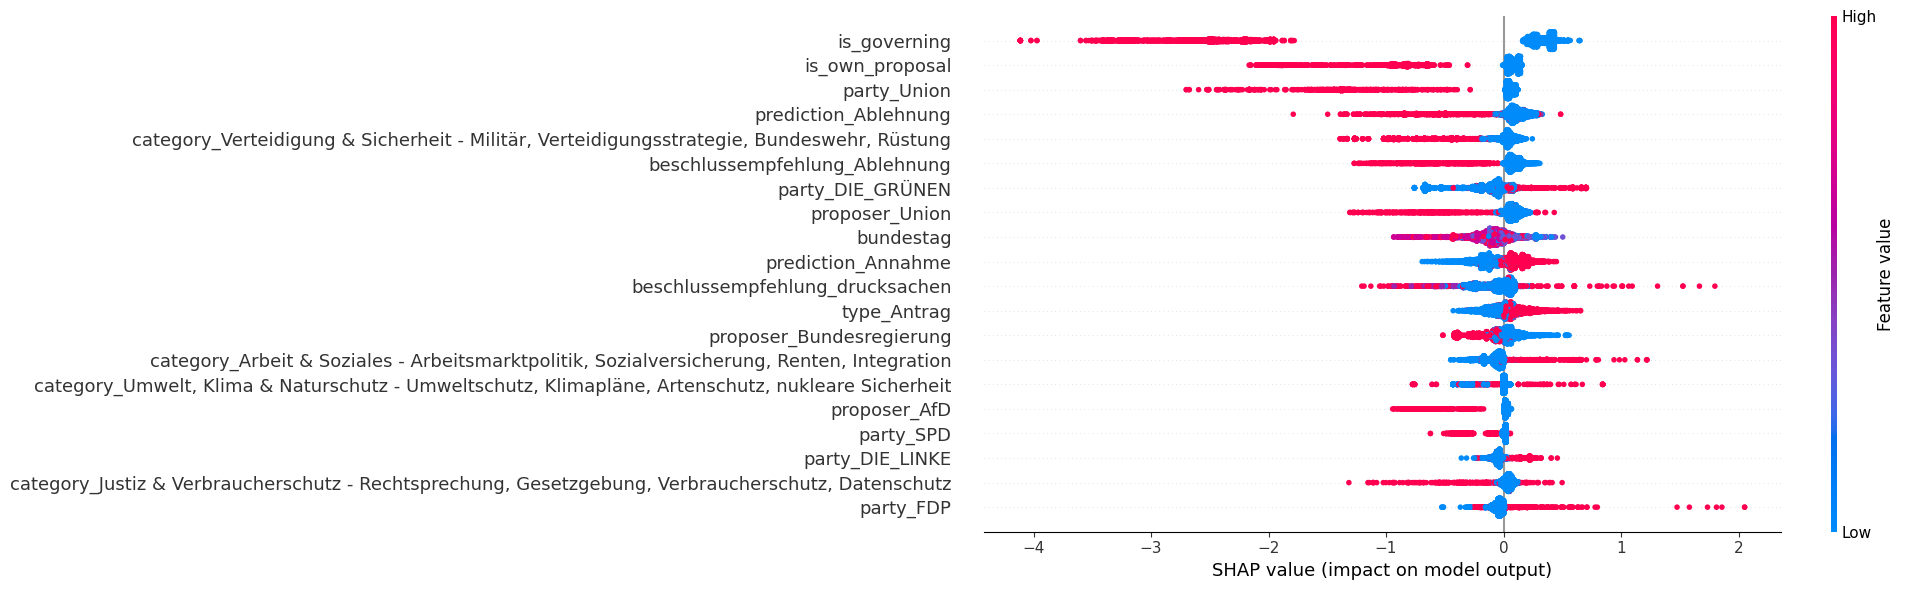

In [2]:
import shap
from matplotlib import pyplot as plt

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[:, :, 2], X_test, plot_size=(20, 6))

In [3]:
le.classes_

NameError: name 'le' is not defined

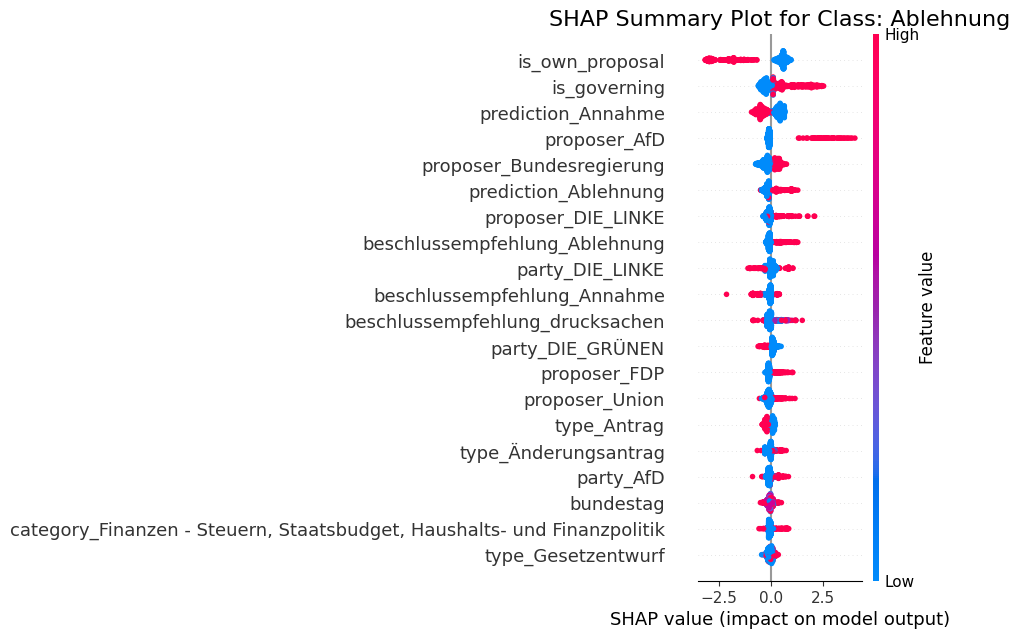

e:\Users\johnn\anaconda3\envs\langchain\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


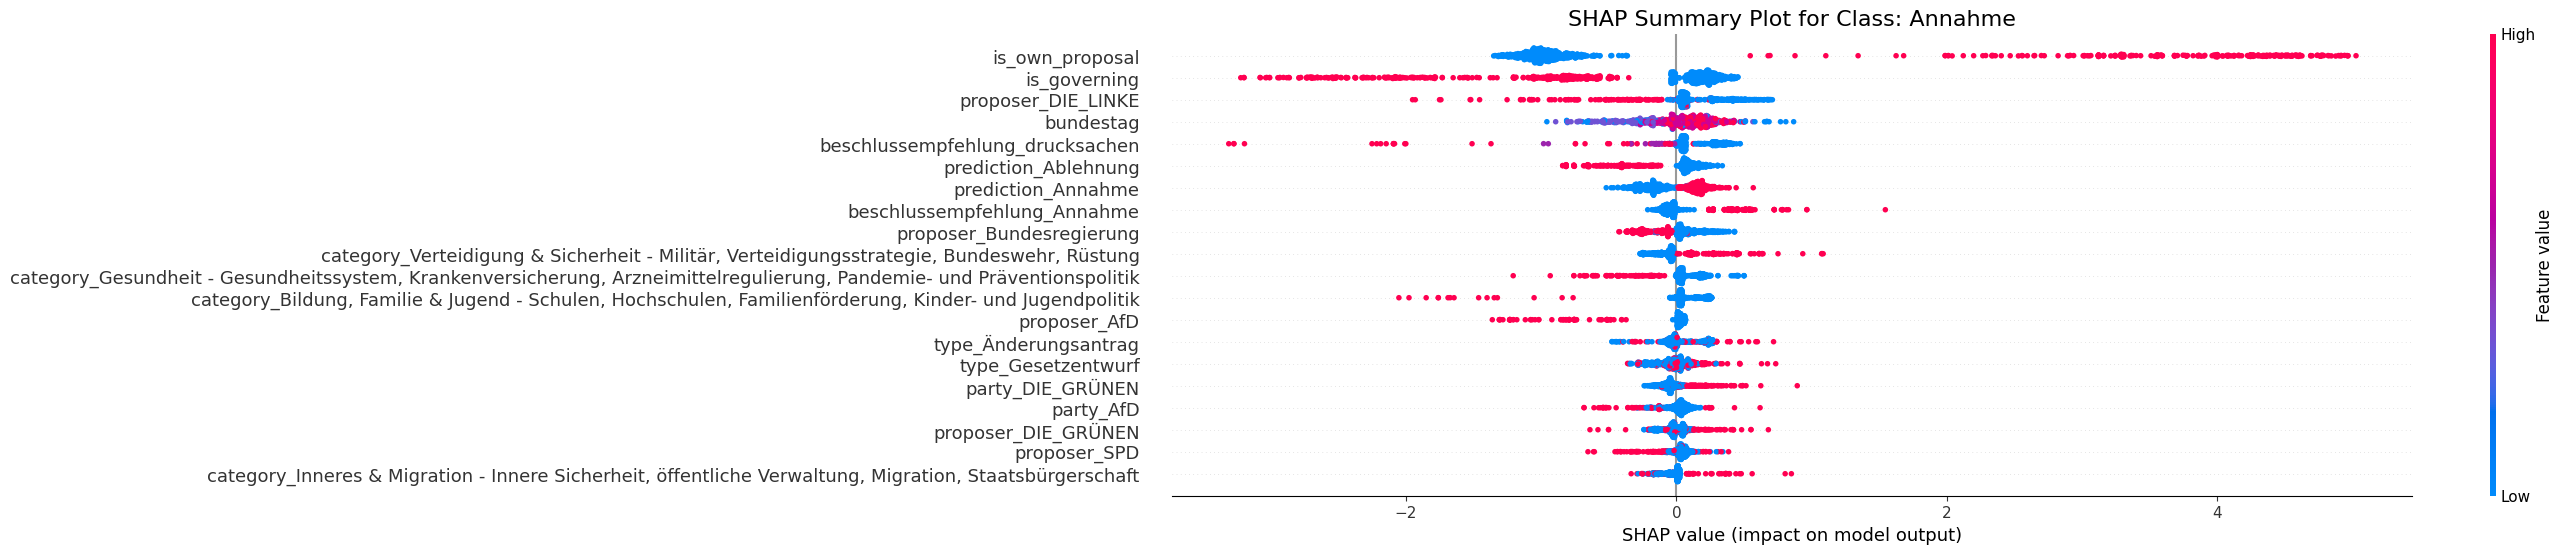

e:\Users\johnn\anaconda3\envs\langchain\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


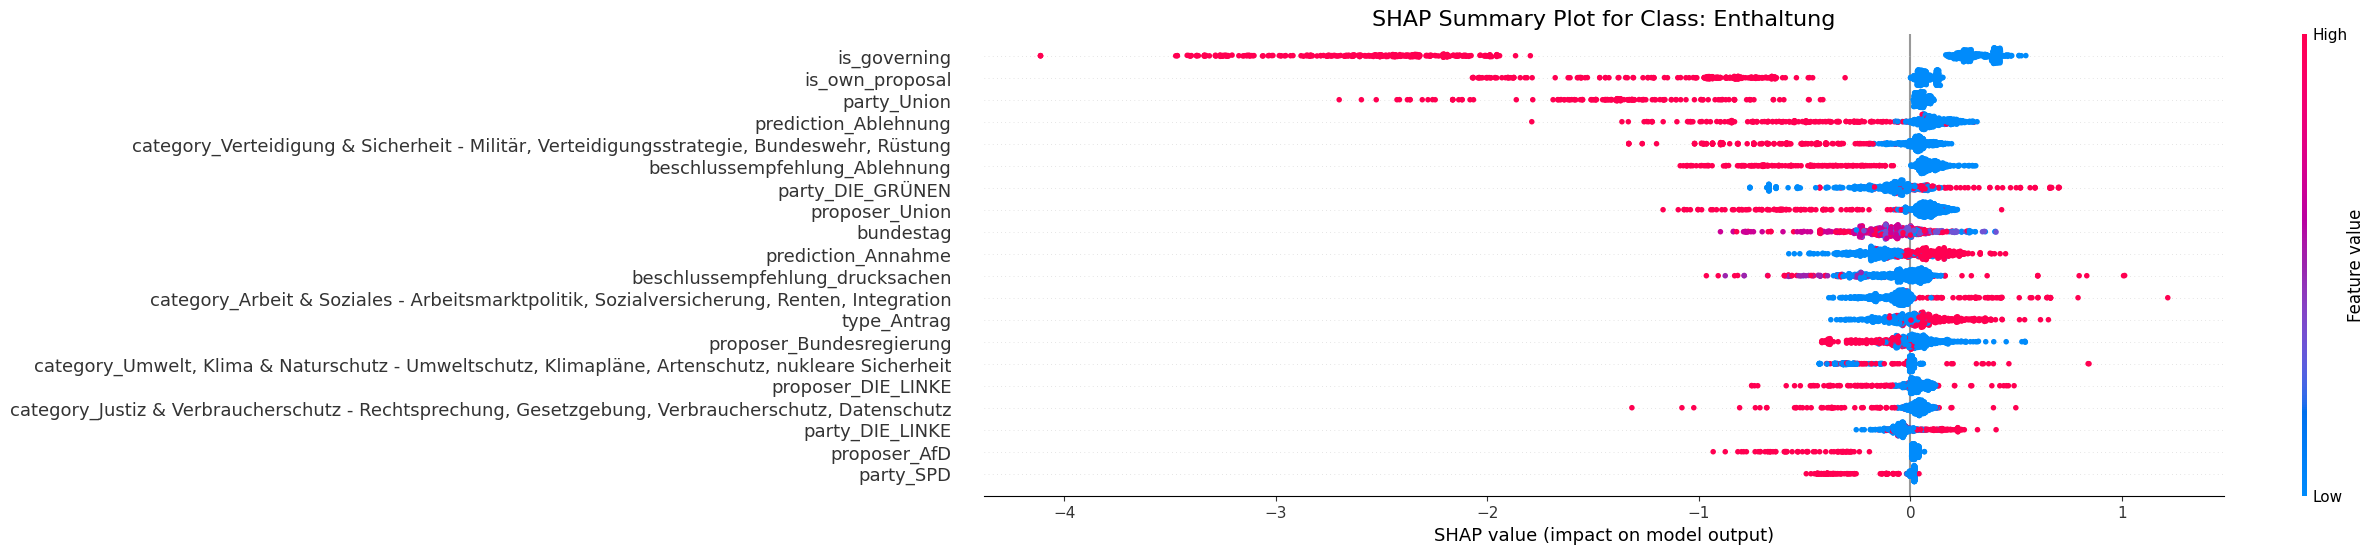

In [ ]:
import shap
from matplotlib import pyplot as plt

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

class_names = le.classes_

for i, class_name in enumerate(class_names):
    shap.summary_plot(shap_values[:, :, i], X_test, show=False)
    fig = plt.gcf()
    fig.set_size_inches(20, 6)
    plt.title(f"SHAP Summary Plot for Class: {class_name}", fontsize=16)
    plt.show()
